# Actividad 1

### A1: Ciudades de Florida

##### Sin Pandas


- Se obtendrá el archivo CSV a través del URL proporcionado.
- Se procesarán los datos utilizando exclusivamente funcionalidades de Python (`csv`, `urllib`).
- Se hará únicamente el conteo de las ciudades del estado de Florida. En caso de múltiples instancias con la misma ciudad, solo contará una vez.

In [5]:
import csv
import urllib.request

import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv"


with urllib.request.urlopen(url) as response:
    lines = [line.decode('utf-8') for line in response.readlines()]
    reader = csv.reader(lines, delimiter='|')

    header = next(reader)
    ciudades_florida = set()

    for row in reader:
        city, _, state_full, _, _ = row
        if state_full.strip() == "Florida":
            ciudades_florida.add(city.strip())

print("Número de ciudades de Florida:", len(ciudades_florida))

Número de ciudades de Florida: 537


##### Con Pandas


- Se hará uso `pandas` para leer el archivo CSV.
- Se filtrarán las filas correspondientes al estado de Florida
- Se contará el número de ciudades únicas.

In [6]:
url = "https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv"


df = pd.read_csv(url, sep='|')

florida_df = df[df["State full"] == "Florida"]

num_ciudades_florida = florida_df["City"].nunique()

print("Número de ciudades de Florida:", num_ciudades_florida)

Número de ciudades de Florida: 537


### A2: Matriz aleatoria

##### Matriz 16x16

- Suma de los elementos
- Media de los elementos
- Mínimo por fila
- Máximo por fila

Cada resultado mostrará como un `array` (16, 1).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
matriz = pd.DataFrame(np.random.randint(0, 101, size=(16, 16)))

print("Matriz 16x16 generada (valores de 0 a 100):\n")
print(matriz)


suma_filas = matriz.sum(axis=1).values.reshape(-1, 1)
media_filas = matriz.mean(axis=1).values.reshape(-1, 1)
min_filas = matriz.min(axis=1).values.reshape(-1, 1)
max_filas = matriz.max(axis=1).values.reshape(-1, 1)

print("\n")
print("Suma por fila:\n", suma_filas)
print("\nMedia por fila:\n", media_filas)
print("\nMínimos por fila:\n", min_filas)
print("\nMáximos por fila:\n", max_filas)

### A3: Broadcasting

##### Ejemplo

Se utilizará como ejemplo para este ejercicio los tableros de puntuación de videojuegos.

- Los datos que se utilizarán son `[Score ,Kills, Deaths, Assists]` para cada fila, lo cual representará a un jugador.

- Existirán 3 equipos (Rojo, Azúl y Blanco) con 5 jugadores cada uno.
- Se simularán tener 3 partidas (Rojo vs Azúl, Rojo vs Blanco y Azúl vs Blanco).
- Cada partida proporcionará dos matrices.

Al final tendré 6 matrices (5x4)

In [2]:
import numpy as np
import pandas as pd

##### Scoreboard

- Generador de los tableros de puntuaciones y estadiscticas.

  - 3 partidas, 6 tableros de puntuación.
  - 15 jugadores con 2 registros de estadisticas, cada uno. 30 registros en total.

In [ ]:
score_range = (1000, 3001)
kills_range = (0, 21)
deaths_range = (0, 7)
assists_range = (0, 21)

equipos = ["Red", "Blue", "White"]
partidas = [("Red", "Blue"), ("Red", "White"), ("Blue", "White")]
estadisticas = {}
columnas = ["Score", "Kills", "Deaths", "Assists"]


for equipo1, equipo2 in partidas:
    for equipo in [equipo1, equipo2]:
        clave = f"{equipo1} vs {equipo2} - {equipo}"
        data = np.column_stack([
            np.random.randint(*score_range, size=5),
            np.random.randint(*kills_range, size=5),
            np.random.randint(*deaths_range, size=5),
            np.random.randint(*assists_range, size=5)
        ])
        estadisticas[clave] = pd.DataFrame(data, columns=columnas)


for team1, team2 in partidas:
    key1 = f"{team1} vs {team2} - {team1}"
    key2 = f"{team1} vs {team2} - {team2}"
    df1 = estadisticas[key1].sort_values(by="Score", ascending=False).reset_index(drop=True)
    df2 = estadisticas[key2].sort_values(by="Score", ascending=False).reset_index(drop=True)

    print(f"\n\n{team1} vs {team2}\n")

    df1 = df1.rename(columns={col: f"{col}_{team1[0]}" for col in df1.columns})
    df2 = df2.rename(columns={col: f"{col}_{team2[0]}" for col in df2.columns})

    separator = pd.DataFrame([[""] * 2] * df1.shape[0], columns=["", " "])

    # Mostrar matrices encontradas en base a la partida:
    df_comparado = pd.concat([df1, separator, df2], axis=1)
    print(df_comparado.to_string(index=False))





Red vs Blue

 Score_R  Kills_R  Deaths_R  Assists_R     Score_B  Kills_B  Deaths_B  Assists_B
    2999       11         6         12        2504        4         2         14
    2598        5         2          3        2404        8         6         15
    1725        0         3          0        1641        2         3          6
    1154        9         5         10        1410        8         3         18
    1081       12         4         20        1233        3         3         15


Red vs White

 Score_R  Kills_R  Deaths_R  Assists_R     Score_W  Kills_W  Deaths_W  Assists_W
    2926       19         0         20        2244        8         0          8
    2757       14         6          9        1775       16         1         18
    1575        6         1          5        1711       14         0         19
    1449       18         4         17        1692       11         1          6
    1228       12         4          6        1526       18         3         

##### Estadisticas totales por equipo 

- Mostrar **suma** de las estadisticas de *cada equipo* a lo largo de sus 2 partidas.

In [ ]:
resumen_equipos = {
    "Red": np.zeros(4, dtype=int),
    "Blue": np.zeros(4, dtype=int),
    "White": np.zeros(4, dtype=int)
}

for clave, matriz in estadisticas.items():
    for equipo in resumen_equipos:
        if clave.endswith(equipo):
            resumen_equipos[equipo] += matriz.sum(axis=0)

df_resumen = pd.DataFrame.from_dict(
    resumen_equipos,
    orient="index",
    columns=["Score", "Kills", "Deaths", "Assists"]
)

print("\nResumen total por equipo:\n")
print(df_resumen)



Resumen total por equipo:

       Score  Kills  Deaths  Assists
Red    19492    106      35      102
Blue   17480     57      22      140
White  16397    119      20       93


##### Estadisticas totales de K/D/A por jugador

- Mostrar **suma** de las estadisticas (Kills/Deaths/Assists) de *cada jugador* a lo largo de sus 2 partidas.

In [ ]:
equipos = ["Red", "Blue", "White"]
columnas_estadisticas = ["Kills", "Deaths", "Assists"]

resumen_equipos = {
    equipo: np.zeros((5, 3), dtype=int) for equipo in equipos
}

for clave, df in estadisticas.items():
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df, columns=["Score", "Kills", "Deaths", "Assists"])
        
    equipo = clave.split(" - ")[-1]
    if equipo in resumen_equipos:
        resumen_equipos[equipo] += df[["Kills", "Deaths", "Assists"]].values


resumen_df = {
    equipo: pd.DataFrame(matriz, columns=columnas_estadisticas)
    for equipo, matriz in resumen_equipos.items()
}

# Mostrar resultados por cada equipo
print("\nRed:\n", resumen_df["Red"])
print("\nBlue:\n", resumen_df["Blue"])
print("\nWhite:\n", resumen_df["White"])




Red:
    Kills  Deaths  Assists
0     30       6       32
1     23      11       19
2     23       6       20
3      6       4        5
4     24       8       26

Blue:
    Kills  Deaths  Assists
0     20       5       31
1     15       8       29
2      7       3       24
3      9       3       24
4      6       3       32

White:
    Kills  Deaths  Assists
0     18       5       19
1     25       5       22
2     33       2       33
3     18       3       14
4     25       5        5


##### K/D por jugador

- Mostrar el **promedio** de K/D de *cada jugador* a lo largo de sus 2 partidas.

In [ ]:
for equipo in resumen_df:
    df = resumen_df[equipo][["Kills", "Deaths"]].copy()
    df["Ratio"] = df["Kills"] / (df["Deaths"] + 1e-5)  # 1e-5 para evitar división por 0

    print(f"\n{equipo}")
    print(df)



Red
   Kills  Deaths     Ratio
0     30       6  4.999992
1     23      11  2.090907
2     23       6  3.833327
3      6       4  1.499996
4     24       8  2.999996

Blue
   Kills  Deaths     Ratio
0     20       5  3.999992
1     15       8  1.874998
2      7       3  2.333326
3      9       3  2.999990
4      6       3  1.999993

White
   Kills  Deaths      Ratio
0     18       5   3.599993
1     25       5   4.999990
2     33       2  16.499918
3     18       3   5.999980
4     25       5   4.999990


##### Rankings

- Mostrar la **puntuación** más *alta*, por equipo, que haya conseguido un jugador en una partida.
- Mostrar la **puntuación** más *baja*, por equipo, que haya conseguido un jugador en una partida.
  
- Mostrar al jugador con *más* **Kills** por cada equipo.
- Mostrar al jugador con *menos* **Kills** por cada equipo.
- Mostrar al jugador con *más* **Assists** por cada equipo.
- Mostrar al jugador con *más* **Deaths** por cada equipo.

In [ ]:
matriz_max_score = []
matriz_min_score = []
matriz_max_kills = []
matriz_min_kills = []
matriz_max_assists = []
matriz_max_deaths = []

equipos = ["Red", "Blue", "White"]
columnas = ["Team", "Score", "Kills", "Deaths", "Assists"]

for equipo in equipos:
    partidas_equipo = [k for k in estadisticas if k.endswith(f"- {equipo}")]

    if not partidas_equipo:
        continue





    ### Para que las matrices con de los mayores y menores Score sean de una sola partida

    mejor_jugador = None
    mejor_score = -1
    for key in partidas_equipo:
        df = estadisticas[key]
        if not isinstance(df, pd.DataFrame):
            df = pd.DataFrame(df, columns=["Score", "Kills", "Deaths", "Assists"])
        df = df.astype(int)
        jugador = df.loc[df["Score"].idxmax()]
        if jugador["Score"] > mejor_score:
            mejor_score = jugador["Score"]
            mejor_jugador = jugador
    matriz_max_score.append([equipo] + mejor_jugador.to_list())

    peor_jugador = None
    menor_score = float('inf')
    for key in partidas_equipo:
        df = estadisticas[key]
        if not isinstance(df, pd.DataFrame):
            df = pd.DataFrame(df, columns=["Score", "Kills", "Deaths", "Assists"])
        df = df.astype(int)
        jugador = df.loc[df["Score"].idxmin()]
        if jugador["Score"] < menor_score:
            menor_score = jugador["Score"]
            peor_jugador = jugador
    matriz_min_score.append([equipo] + peor_jugador.to_list())



    ### El resto de matrices se obtienen en base a los totales

    df_total = pd.concat([estadisticas[k] for k in partidas_equipo], ignore_index=True)
    df_total.columns = ["Score", "Kills", "Deaths", "Assists"]
    df_equipo = df_total.groupby(df_total.index % 5).sum()

    max_kills = df_equipo.loc[df_equipo["Kills"].idxmax()].to_list()
    min_kills = df_equipo.loc[df_equipo["Kills"].idxmin()].to_list()
    max_assists = df_equipo.loc[df_equipo["Assists"].idxmax()].to_list()
    max_deaths = df_equipo.loc[df_equipo["Deaths"].idxmax()].to_list()

    matriz_max_kills.append([equipo] + max_kills)
    matriz_min_kills.append([equipo] + min_kills)
    matriz_max_assists.append([equipo] + max_assists)
    matriz_max_deaths.append([equipo] + max_deaths)





df_max_score = pd.DataFrame(matriz_max_score, columns=columnas)
df_min_score = pd.DataFrame(matriz_min_score, columns=columnas)
df_max_kills = pd.DataFrame(matriz_max_kills, columns=columnas)
df_min_kills = pd.DataFrame(matriz_min_kills, columns=columnas)
df_max_assists = pd.DataFrame(matriz_max_assists, columns=columnas)
df_max_deaths = pd.DataFrame(matriz_max_deaths, columns=columnas)

df_max_score = df_max_score.sort_values(by="Score", ascending=False)
df_min_score = df_min_score.sort_values(by="Score", ascending=True)
df_max_kills = df_max_kills.sort_values(by="Kills", ascending=False)
df_min_kills = df_min_kills.sort_values(by="Kills", ascending=True)
df_max_assists = df_max_assists.sort_values(by="Assists", ascending=False)
df_max_deaths = df_max_deaths.sort_values(by="Deaths", ascending=False)


print("\nJugadores con mayor Score en una partida:\n")
print(df_max_score[["Team", "Score"]].to_string(index=False) + "\n")

print("Jugadores con menor Score en una partida:\n")
print(df_min_score[["Team", "Score"]].to_string(index=False) + "\n")

print("Jugadores con más Kills totales:\n")
print(df_max_kills[["Team", "Kills"]].to_string(index=False) + "\n")

print("Jugadores con menos Kills totales:\n")
print(df_min_kills[["Team", "Kills"]].to_string(index=False) + "\n")

print("Jugadores con más Assists totales:\n")
print(df_max_assists[["Team", "Assists"]].to_string(index=False) + "\n")

print("Jugadores con más Deaths totales:\n")
print(df_max_deaths[["Team", "Deaths"]].to_string(index=False))




Jugadores con mayor Score en una partida:

 Team  Score
  Red   2999
White   2777
 Blue   2504

Jugadores con menor Score en una partida:

 Team  Score
 Blue   1013
White   1015
  Red   1081

Jugadores con más Kills totales:

 Team  Kills
White     33
  Red     30
 Blue     20

Jugadores con menos Kills totales:

 Team  Kills
  Red      6
 Blue      6
White     18

Jugadores con más Assists totales:

 Team  Assists
White       33
  Red       32
 Blue       32

Jugadores con más Deaths totales:

 Team  Deaths
  Red      11
 Blue       8
White       5


### A4: Sistemas de ecuaciones

- Se solucionarán los siguientes sistemas de ecuaciones:
  

    - $ A : \begin{cases} -9y +  4x = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
coeficientes_A = np.array([[4, -9],
               [16, -7]])
resultado_A = np.array([20, 80])
solucion_A = np.linalg.solve(coeficientes_A, resultado_A)


coeficientes_B = np.array([[1, -2, 3],
               [2, 1, 1],
               [-3, 2, -2]])
resultado_B = np.array([7, 4, -10])
solucion_B = np.linalg.solve(coeficientes_B, resultado_B)


solucion_A = pd.DataFrame([solucion_A], columns=["x", "y"])
solucion_B = pd.DataFrame([solucion_B], columns=["x", "y", "z"])



print("Solución del Sistema A:")
print(solucion_A.to_string(index=False))

print("\nSolución del Sistema B:")
print(solucion_B.to_string(index=False))


Solución del Sistema A:
  x    y
5.0 -0.0

Solución del Sistema B:
  x    y   z
2.0 -1.0 1.0


### A5: DataFrame

- Se creará un DataFrame con dimensiones de `10x10`.
- Se utilizarán números aleatorios dentro del rango `[0,20]`.
- S reemplazarán todos los elementos menores a 5 por `NaN`.
- Se contará la cantidad de elementos `NaN` por cada fila.

In [2]:
import numpy as np
import pandas as pd

In [18]:
df = pd.DataFrame(np.random.randint(0, 21, size=(10, 10)))

df = df.mask(df < 5, np.nan)

nan_por_fila = df.isna().sum(axis=1)

print("DataFrame:\n\n")
print(df)

print("\n\nCantidad de NaN por fila:\n")
print(nan_por_fila)

DataFrame:


      0     1     2     3     4     5     6     7     8     9
0  17.0   NaN   7.0  11.0   NaN   8.0  12.0  20.0   NaN  11.0
1   NaN  13.0   5.0   NaN   7.0   9.0  13.0   NaN   NaN   NaN
2  16.0  17.0  20.0  10.0  11.0  18.0   NaN   NaN  16.0  17.0
3  11.0  19.0   6.0  13.0  12.0  19.0  20.0  17.0  13.0  14.0
4   9.0   6.0   6.0  10.0   NaN  10.0  12.0   NaN  20.0  11.0
5  15.0  19.0   5.0  16.0  10.0  12.0  20.0   9.0  13.0   6.0
6  12.0  16.0  15.0  20.0   5.0  11.0  10.0  13.0  20.0   8.0
7   7.0  19.0   NaN  13.0   6.0  11.0  17.0   7.0  14.0   9.0
8  14.0  13.0  16.0  16.0   NaN   6.0   NaN  12.0  19.0   5.0
9   5.0   6.0  12.0   7.0   NaN   NaN   8.0  14.0  12.0  11.0


Cantidad de NaN por fila:

0    3
1    5
2    2
3    0
4    2
5    0
6    0
7    1
8    2
9    2
dtype: int64


### A6: Datasets

- Se utilizará Pandas para obtener:
  
  - Alumno con la mejor nota y asignatura.
  - Alumnos con asignaturas suspendidas en el primer semestre.
  - La media de edad de los asistentes a la asignatura de Python
  - Utilizar las iniciales de los estudiantes, ordenados por edad, para formar una palabra.
  

- Se generará un grafica para:
  
  - Una agrupación por sexo para clasificar las notas medias de todos los estudiantes por asignatura.
  - Una agrupando por sexo para visualizar la densidad bivariable de la edad de los estudiantes frente a sus notas (dispersión de los datos por la zona central y curvas de densidad a lo largo de los ejes).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔹 Alumno con mayor calificación: Yael
🔹 Asignatura: Python
🔹 Alumnos con materias suspendiada en 1er Semestre: 3
🔹 Edad media de asistentes a Python: 32.4
🔹 Palabra formada con iniciales (ordenadas por edad): PYTHON


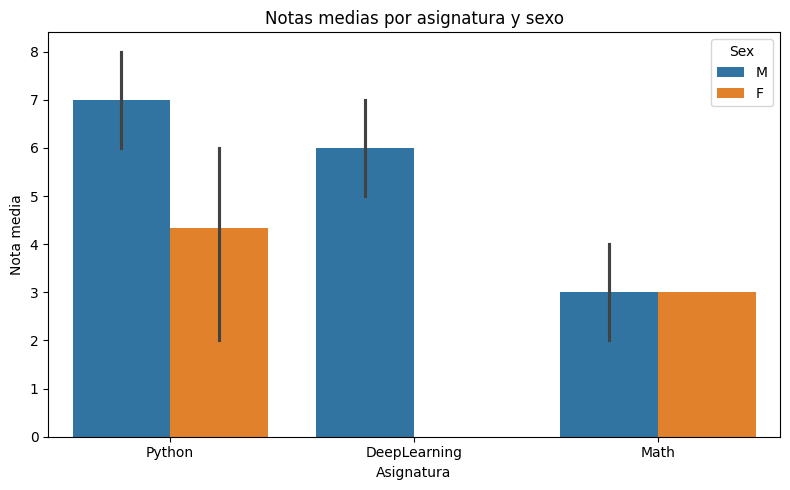

<Figure size 800x600 with 0 Axes>

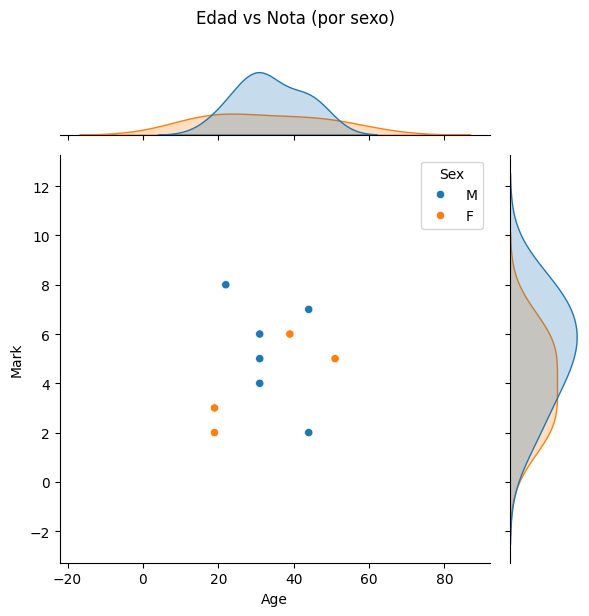

In [4]:
students = {
    'StudentId': [1, 2, 3, 4, 5, 6],
    'Name': ['Yael', 'Thomas', 'Paula', 'Orlando', 'Hannah', 'Nicole'],
    'Age': [22, 31, 19, 44, 39, 51],
    'Sex': ['M', 'M', 'F', 'M', 'F', 'F']
}

subjects = {
    'SubjectId': [1, 2, 3],
    'Name': ['Python', 'Math', 'DeepLearning'],
    'Semester': [1, 1, 2]
}

marks = {
    'StudentId': [2, 2, 1, 3, 6, 4, 4, 3, 2, 5],
    'SubjectId': [1, 3, 1, 2, 1, 2, 3, 1, 2, 1],
    'Mark':      [6, 5, 8, 3, 5, 2, 7, 2, 4, 6]
}

df_students = pd.DataFrame(students)
df_subjects = pd.DataFrame(subjects)
df_marks = pd.DataFrame(marks)

df = df_marks.merge(df_students, on='StudentId')
df = df.merge(df_subjects, on='SubjectId', suffixes=('', '_Subject'))


mejor_nota_fila = df.loc[df['Mark'].idxmax()]
alumno_mejor_nota = mejor_nota_fila['Name']
asignatura_mejor_nota = mejor_nota_fila['Name_Subject']

suspendidos_S1 = df[(df['Semester'] == 1) & (df['Mark'] < 5)]
num_alumnos_suspendidos = suspendidos_S1['StudentId'].nunique()

edad_media_python = df[df['Name_Subject'] == 'Python']['Age'].mean()

iniciales = ''.join(df_students.sort_values('Age')['Name'].str[0])



# ========================================================================
#                                Resultados:
# ========================================================================

print("🔹 Alumno con mayor calificación:", alumno_mejor_nota)
print("🔹 Asignatura:", asignatura_mejor_nota)
print("🔹 Alumnos con materias suspendiada en 1er Semestre:", num_alumnos_suspendidos)
print("🔹 Edad media de asistentes a Python:", round(edad_media_python, 2))
print("🔹 Palabra formada con iniciales (ordenadas por edad):", iniciales)


# ========================================================================
#                     Nota media por asignatura y sexo.
# ========================================================================

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Name_Subject', y='Mark', hue='Sex', estimator=np.mean)
plt.title('Notas medias por asignatura y sexo')
plt.ylabel('Nota media')
plt.xlabel('Asignatura')
plt.tight_layout()
plt.show()


# ========================================================================
#                               Edad vs Nota
# ========================================================================

plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='Age', y='Mark', hue='Sex', kind='scatter')
plt.suptitle('Edad vs Nota (por sexo)', y=1.02)
plt.tight_layout()
plt.show()


### A7: Series

- Se implementará la función `find_not_common`.
- Se utilizarán dos series como referencia. 
- El resultado será una serie con los elementos no comúnes: `[4, 6, 14, 16]`

In [ ]:
import pandas as pd

In [11]:
def find_not_common(s1, s2):
    set1 = set(s1)
    set2 = set(s2)

    not_in_s2 = [x for x in s1 if x not in set2]
    not_in_s1 = [x for x in s2 if x not in set1]

    return pd.Series(not_in_s2 + not_in_s1)

p1 = pd.Series([2, 4, 12, 6, 8, 10])
p2 = pd.Series([8, 10, 12, 10, 14, 2, 16, 10])

print("Serie de not_commons:\n",find_not_common(p1, p2).tolist())



Serie de not_commons:
 [4, 6, 14, 16]
